<a href="https://colab.research.google.com/github/Shahduzzaman/X-RAY_CovPneuSense/blob/main/Pneumonia_Model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AAA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lung_XRay_Dataset.zip to Lung_XRay_Dataset.zip


In [ ]:
import zipfile
import os

zip_path = "Lung_XRay_Dataset.zip"
extract_path = "Lung_xray_Data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt


In [ ]:
train_dir = 'Lung_xray_Data/Lung_xray_Dataset/lungs_xray_dataset/train'
val_dir = 'Lung_xray_Data/Lung_xray_Dataset/lungs_xray_dataset/val'
test_dir = 'Lung_xray_Data/Lung_xray_Dataset/lungs_xray_dataset/test'


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 1878 images belonging to 2 classes.
Found 237 images belonging to 2 classes.
Found 235 images belonging to 2 classes.


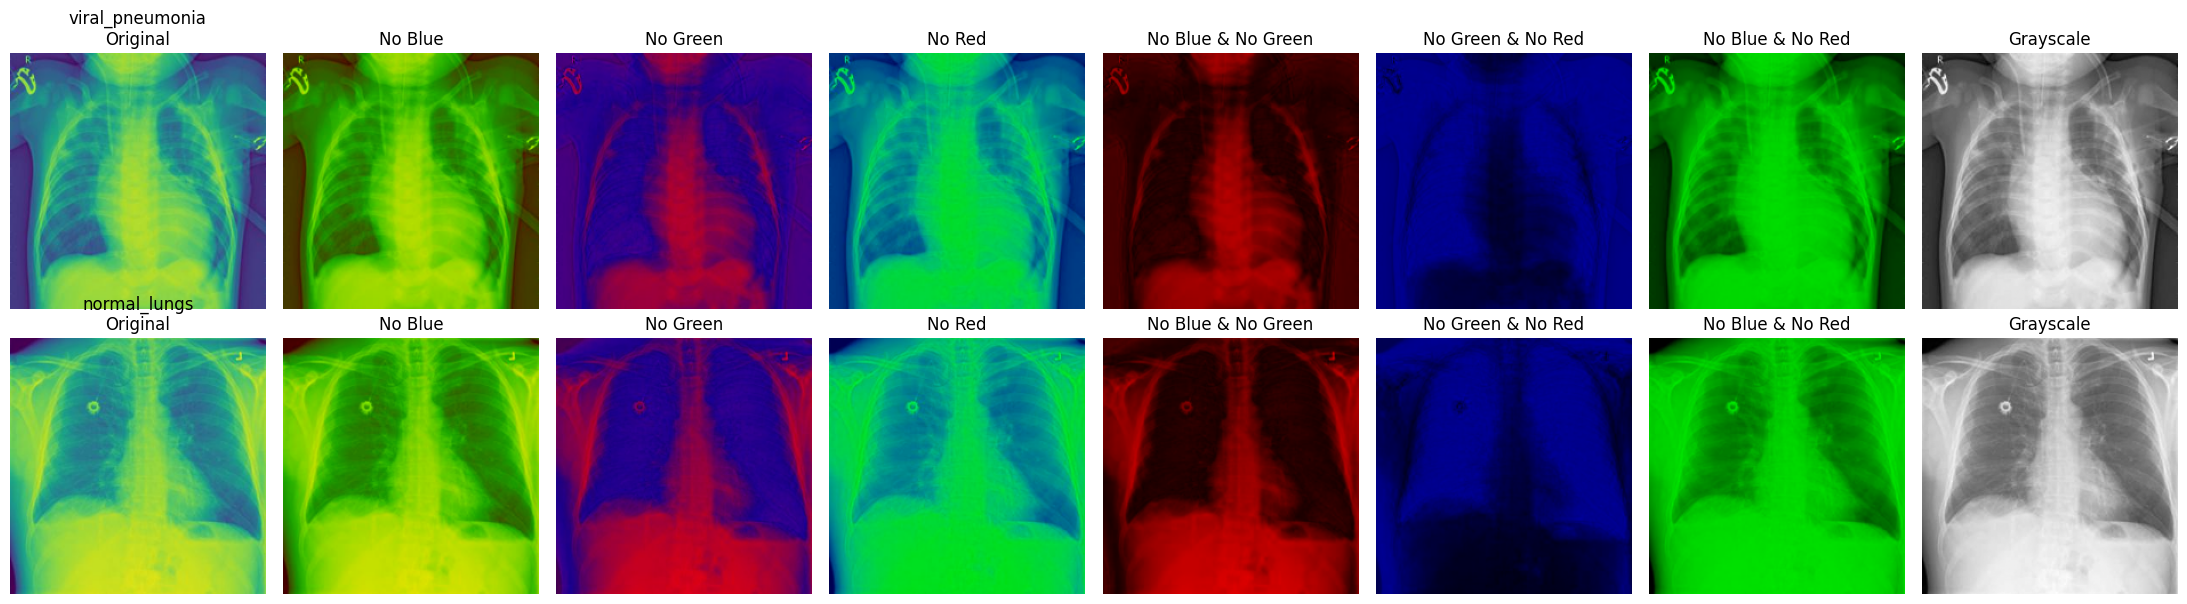

In [ ]:
# import matplotlib.pyplot as plt
# import os
# import matplotlib.image as mpimg
# import tensorflow as tf

# # Path to train directory
# train_dir = 'Lung_xray_Data/Lung_xray_Dataset/lungs_xray_dataset/train'

# # The three classes
# classes = ['viral_pneumonia', 'normal_lungs']

# plt.figure(figsize=(22, 6))

# for i, cls in enumerate(classes):
#     # Path to the first image in this class folder
#     class_path = os.path.join(train_dir, cls)
#     first_img_name = os.listdir(class_path)[0]
#     img_path = os.path.join(class_path, first_img_name)

#     # Read and resize
#     img = mpimg.imread(img_path)
#     img_resized = tf.image.resize(img, (224, 224)).numpy().astype("uint8")

#     # Variations
#     img_no_blue = img_resized.copy()
#     img_no_blue[..., 2] = 0

#     img_no_green = img_resized.copy()
#     img_no_green[..., 1] = 0

#     img_no_red = img_resized.copy()
#     img_no_red[..., 0] = 0

#     img_no_blue_green = img_resized.copy()
#     img_no_blue_green[..., 1] = 0
#     img_no_blue_green[..., 2] = 0  # Only red left

#     img_no_green_red = img_resized.copy()
#     img_no_green_red[..., 0] = 0
#     img_no_green_red[..., 1] = 0  # Only blue left

#     img_no_blue_red = img_resized.copy()
#     img_no_blue_red[..., 0] = 0
#     img_no_blue_red[..., 2] = 0  # Only green left

#     img_no_all = img_resized.copy()
#     img_no_all[..., 0] = 0
#     img_no_all[..., 1] = 0
#     img_no_all[..., 2] = 0  # All black

#     # Plot
#     plt.subplot(len(classes), 8, i*8 + 1)
#     plt.imshow(img_resized)
#     plt.title(f"{cls}\nOriginal")
#     plt.axis('off')

#     plt.subplot(len(classes), 8, i*8 + 2)
#     plt.imshow(img_no_blue)
#     plt.title("No Blue")
#     plt.axis('off')

#     plt.subplot(len(classes), 8, i*8 + 3)
#     plt.imshow(img_no_green)
#     plt.title("No Green")
#     plt.axis('off')

#     plt.subplot(len(classes), 8, i*8 + 4)
#     plt.imshow(img_no_red)
#     plt.title("No Red")
#     plt.axis('off')

#     plt.subplot(len(classes), 8, i*8 + 5)
#     plt.imshow(img_no_blue_green)
#     plt.title("No Blue & No Green")
#     plt.axis('off')

#     plt.subplot(len(classes), 8, i*8 + 6)
#     plt.imshow(img_no_green_red)
#     plt.title("No Green & No Red")
#     plt.axis('off')

#     plt.subplot(len(classes), 8, i*8 + 7)
#     plt.imshow(img_no_blue_red)
#     plt.title("No Blue & No Red")
#     plt.axis('off')

#     plt.subplot(len(classes), 8, i*8 + 8)
#     plt.imshow(img_no_all)
#     plt.title("No R, G, B")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()





import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np

# Path to train directory
train_dir = 'Lung_xray_Data/Lung_xray_Dataset/lungs_xray_dataset/train'

# The three classes
classes = ['viral_pneumonia', 'normal_lungs']

plt.figure(figsize=(22, 6))

for i, cls in enumerate(classes):
    # Path to the first image in this class folder
    class_path = os.path.join(train_dir, cls)
    first_img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, first_img_name)

    # Read and resize
    img = mpimg.imread(img_path)
    img_resized = tf.image.resize(img, (224, 224)).numpy().astype("uint8")

    # Variations
    img_no_blue = img_resized.copy()
    img_no_blue[..., 2] = 0

    img_no_green = img_resized.copy()
    img_no_green[..., 1] = 0

    img_no_red = img_resized.copy()
    img_no_red[..., 0] = 0

    img_no_blue_green = img_resized.copy()
    img_no_blue_green[..., 1] = 0
    img_no_blue_green[..., 2] = 0  # Only red left

    img_no_green_red = img_resized.copy()
    img_no_green_red[..., 0] = 0
    img_no_green_red[..., 1] = 0  # Only blue left

    img_no_blue_red = img_resized.copy()
    img_no_blue_red[..., 0] = 0
    img_no_blue_red[..., 2] = 0  # Only green left

    # Convert to grayscale
    img_gray = np.dot(img_resized[...,:3], [0.2989, 0.5870, 0.1140])

    # Plot
    plt.subplot(len(classes), 8, i*8 + 1)
    plt.imshow(img_resized)
    plt.title(f"{cls}\nOriginal")
    plt.axis('off')

    plt.subplot(len(classes), 8, i*8 + 2)
    plt.imshow(img_no_blue)
    plt.title("No Blue")
    plt.axis('off')

    plt.subplot(len(classes), 8, i*8 + 3)
    plt.imshow(img_no_green)
    plt.title("No Green")
    plt.axis('off')

    plt.subplot(len(classes), 8, i*8 + 4)
    plt.imshow(img_no_red)
    plt.title("No Red")
    plt.axis('off')

    plt.subplot(len(classes), 8, i*8 + 5)
    plt.imshow(img_no_blue_green)
    plt.title("No Blue & No Green")
    plt.axis('off')

    plt.subplot(len(classes), 8, i*8 + 6)
    plt.imshow(img_no_green_red)
    plt.title("No Green & No Red")
    plt.axis('off')

    plt.subplot(len(classes), 8, i*8 + 7)
    plt.imshow(img_no_blue_red)
    plt.title("No Blue & No Red")
    plt.axis('off')

    plt.subplot(len(classes), 8, i*8 + 8)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Get one batch from train data
images, labels = next(train_data)

# Find index where label is 'viral_pneumonia'
viral_index = np.argmax(train_data.class_indices['viral_pneumonia'])

# Find the first image in the batch that is viral_pneumonia
for i in range(len(labels)):
    if np.argmax(labels[i]) == viral_index:
        original_img = images[i]
        break

# Remove green channel (channel 1)
img_no_green = original_img.copy()
img_no_green[:, :, 1] = 0


NameError: name 'train_data' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 527s 5s/step - accuracy: 0.5469 - loss: 0.9046 - val_accuracy: 0.8075 - val_loss: 0.4689
Epoch 2/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 520s 5s/step - accuracy: 0.7696 - loss: 0.5461 - val_accuracy: 0.8151 - val_loss: 0.4341
Epoch 3/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 559s 5s/step - accuracy: 0.7982 - loss: 0.5080 - val_accuracy: 0.8427 - val_loss: 0.3866
Epoch 4/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 515s 5s/step - accuracy: 0.8111 - loss: 0.4833 - val_accuracy: 0.8435 - val_loss: 0.3723
Epoch 5/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 513s 5s/step - accuracy: 0.8133 - loss: 0.4716 - val_accuracy: 0.8561 - val_loss: 0.3513
Epoch 6/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 515s 5s/step - accuracy: 0.8246 - loss: 0.4253 - val_accuracy: 0.8661 - val_loss: 0.3293
Epoch 7/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 513s 5s/step - accuracy: 0.8123 - loss: 0.4450 - val_accuracy: 0.8544 - val_loss: 0.3346
Epoch 8/15
109/109 ━━━━━━━━━━━━━━━━━━━━ 508s 5s/step - accuracy: 0.8362 - loss: 0.4322 - val_accu

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")

72/72 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7430 - loss: 0.5934
Test Accuracy: 81.22%


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving pneumonia1.jpg to pneumonia1.jpg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'pneumonia1.jpg'


img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction[0])

class_labels = list(train_data.class_indices.keys())


print(f"Predicted class: {class_labels[predicted_class]}")
print(f"Probabilities: {dict(zip(class_labels, prediction[0]))}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted class: Viral_Pneumonia
Probabilities: {'Lung_Opacity': np.float32(0.15019812), 'Normal': np.float32(0.06960025), 'Viral_Pneumonia': np.float32(0.7802017)}
